In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("C:\\Users\\thora\\insurance.csv")

In [3]:
df.head()

,age,affordibility,insurance
0,21,1,0
1,25,1,0
2,31,0,0
3,50,1,1
4,41,1,1


In [4]:
df.drop(['affordibility'],axis = 1,inplace = True)

In [5]:
df.head()

,age,insurance
0,21,0
1,25,0
2,31,0
3,50,1
4,41,1


In [6]:
df.tail()

,age,insurance
29,18,0
30,17,0
31,25,0
32,35,1
33,44,1


In [7]:
df.sample()

,age,insurance
25,19,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        34 non-null     int64
 1   insurance  34 non-null     int64
dtypes: int64(2)
memory usage: 672.0 bytes


In [9]:
df.isnull().sum()

age          0
insurance    0
dtype: int64

In [10]:
df.describe()

,age,insurance
count,34.000000,34.000000
mean,35.911765,0.500000
std,13.369725,0.507519
min,17.000000,0.000000
25%,25.000000,0.000000
50%,34.500000,0.500000
75%,44.000000,1.000000
max,61.000000,1.000000


In [11]:
import matplotlib.pyplot as plt

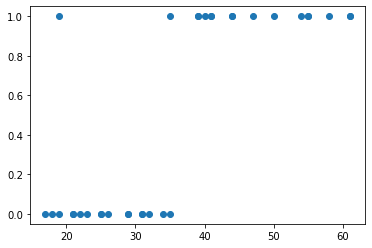

In [12]:
plt.scatter(df['age'],df['insurance'])
plt.show()

# Classification

# Logistic Regression(sigmaid)

In [13]:
!pip install sklearn

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

In [16]:
model.fit(df[['age']],df.insurance)

LogisticRegression()

In [17]:
model.coef_

array([[0.27996302]])

In [18]:
model.intercept_

array([-9.67687081])

In [19]:
model.score(df[['age']],df.insurance)

0.9411764705882353

In [20]:
df.insurance[:5]

0    0
1    0
2    0
3    1
4    1
Name: insurance, dtype: int64

In [21]:
df[['age']][:5]

,age
0,21
1,25
2,31
3,50
4,41


In [22]:
predict = model.predict(df[['age']])

In [23]:
predict[:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [24]:
df.insurance[5:15]

5     0
6     1
7     1
8     1
9     0
10    0
11    1
12    1
13    1
14    1
Name: insurance, dtype: int64

In [25]:
predict[5:15]

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [26]:
model.predict([[53]])

C:\Users\thora\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [27]:
df.shape

(34, 2)

# confusion matrix

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(df.insurance,predict)

In [30]:
cm

array([[16,  1],
       [ 1, 16]], dtype=int64)

In [31]:
!pip install seaborn

In [32]:
import seaborn as sns

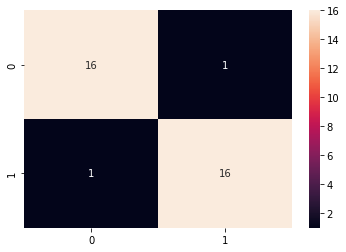

In [33]:
sns.heatmap(cm,annot = True)
plt.show()

# train_test_split

In [34]:
X = df[['age']]

In [35]:
X.head()

,age
0,21
1,25
2,31
3,50
4,41


In [36]:
y = df.insurance

In [37]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: insurance, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [40]:
X_train

,age
12,44
32,35
9,23
0,21
4,41
16,31
17,39
5,35
13,61
11,41


In [41]:
X_train.shape

(27, 1)

In [42]:
X_test.shape

(7, 1)

In [43]:
y_train.shape

(27,)

In [44]:
X_test

,age
15,29
19,58
27,40
26,26
8,19
24,21
21,39


In [45]:
y_test

15    0
19    1
27    1
26    0
8     1
24    0
21    1
Name: insurance, dtype: int64

In [46]:
model.fit(X_train,y_train)

LogisticRegression()

In [47]:
model.score(X_test,y_test)

0.8571428571428571

In [48]:
predict = model.predict(X_test)

In [49]:
predict

array([0, 1, 1, 0, 0, 0, 1], dtype=int64)

<AxesSubplot:>

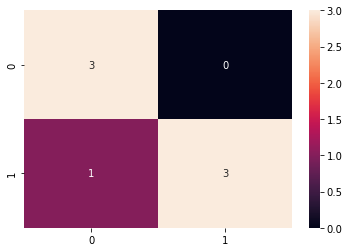

In [50]:
cm = confusion_matrix(y_test,predict)
sns.heatmap(cm,annot = True)